In [1]:
import torch
import numpy as np
import sys
import os

main_dir = r'D:\LARGE_CNN\ECG_ML\MAIN'
if main_dir not in sys.path:
    sys.path.append(main_dir)
from dataloader import MyCustomDataset
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.optim as optim


from model_nn import  Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
os.listdir()

['0_main.ipynb',
 'data_1dAVB_single_image_100px_0.txt',
 'data_1dAVB_single_image_100px_1.txt',
 'data_1dAVB_single_image_100px_2.txt',
 'data_1dAVB_single_image_100px_3.txt',
 'data_1dAVB_single_image_100px_4.txt',
 'data_1dAVB_single_image_100px_5.txt',
 'data_1dAVB_single_image_100px_6.txt',
 'data_1dAVB_single_image_100px_7.txt',
 'data_1dAVB_single_image_100px_8.txt',
 'data_1dAVB_single_image_100px_9.txt',
 'data_AF_single_image_100px_0.txt',
 'data_AF_single_image_100px_1.txt',
 'data_AF_single_image_100px_2.txt',
 'data_AF_single_image_100px_3.txt',
 'data_AF_single_image_100px_4.txt',
 'data_AF_single_image_100px_5.txt',
 'data_AF_single_image_100px_6.txt',
 'data_AF_single_image_100px_7.txt',
 'data_AF_single_image_100px_8.txt',
 'data_AF_single_image_100px_9.txt',
 'data_LBBB_single_image_100px_0.txt',
 'data_LBBB_single_image_100px_1.txt',
 'data_LBBB_single_image_100px_2.txt',
 'data_LBBB_single_image_100px_3.txt',
 'data_LBBB_single_image_100px_4.txt',
 'data_LBBB_single

In [9]:
cc = np.loadtxt('disease_ST_svd_zenedo_im_5.txt')
cc.shape


(500, 307200)

In [10]:
data_1dAVB_list=[]
for i in range(10):
    cc = np.loadtxt('disease_1dAVB_svd_zenedo_im_'+str(i)+'.txt')
    data_1dAVB_list.append(cc)
    # if i==0:
    print(cc.shape)
    print(f"data 1dAVB of length {len(cc)} in {i} index loaded")
print(data_1dAVB_list[0].shape)
data_1dAVB_list=np.reshape(data_1dAVB_list,(5000,480,640))

data_AF_list=[]
for i in range(10):
    cc = np.loadtxt('disease_AF_svd_zenedo_im_'+str(i)+'.txt')
    data_AF_list.append(cc)
    # if i==0:
    print(cc.shape)
    print(f"data AF of length {len(cc)} in {i} index loaded")
print(data_AF_list[0].shape)
data_AF_list=np.reshape(data_AF_list,(5000,480,640))

data_LBBB_list=[]
for i in range(10):
    cc = np.loadtxt('disease_LBBB_svd_zenedo_im_'+str(i)+'.txt')
    data_LBBB_list.append(cc)
    # if i==0:
    print(cc.shape)
    print(f"data LBBB of length {len(cc)} in {i} index loaded")
print(data_LBBB_list[0].shape)
data_LBBB_list=np.reshape(data_LBBB_list,(5000,480,640))

data_normal_list=[]
for i in range(10):
    cc = np.loadtxt('disease_normal_svd_zenedo_im_'+str(i)+'.txt')
    data_normal_list.append(cc)
    # if i==0:
    print(cc.shape)
    print(f"data normal of length {len(cc)} in {i} index loaded")
print(data_normal_list[0].shape)
data_normal_list=np.reshape(data_normal_list,(5000,480,640))

data_RBBB_list=[]
for i in range(10):
    cc = np.loadtxt('disease_RBBB_svd_zenedo_im_'+str(i)+'.txt')
    data_RBBB_list.append(cc)
    # if i==0:
    print(cc.shape)
    print(f"data RBBB of length {len(cc)} in {i} index loaded")
print(data_RBBB_list[0].shape)
data_RBBB_list=np.reshape(data_RBBB_list,(5000,480,640))

data_SB_list=[]
for i in range(10):
    cc = np.loadtxt('disease_SB_svd_zenedo_im_'+str(i)+'.txt')
    data_SB_list.append(cc)
    # if i==0:
    print(cc.shape)
    print(f"data SB of length {len(cc)} in {i} index loaded")
print(data_SB_list[0].shape)
data_SB_list=np.reshape(data_SB_list,(5000,480,640))

data_ST_list=[]
for i in range(10):
    cc = np.loadtxt('disease_ST_svd_zenedo_im_'+str(i)+'.txt')
    data_ST_list.append(cc)
    # if i==0:
    print(cc.shape)
    print(f"data ST of length {len(cc)} in {i} index loaded")
print(data_ST_list[0].shape)
data_ST_list=np.reshape(data_ST_list,(5000,480,640))




(500, 307200)
data 1dAVB of length 500 in 0 index loaded
(500, 307200)
data 1dAVB of length 500 in 1 index loaded
(500, 307200)
data 1dAVB of length 500 in 2 index loaded
(500, 307200)
data 1dAVB of length 500 in 3 index loaded
(500, 307200)
data 1dAVB of length 500 in 4 index loaded
(500, 307200)
data 1dAVB of length 500 in 5 index loaded
(500, 307200)
data 1dAVB of length 500 in 6 index loaded
(500, 307200)
data 1dAVB of length 500 in 7 index loaded
(500, 307200)
data 1dAVB of length 500 in 8 index loaded
(500, 307200)
data 1dAVB of length 500 in 9 index loaded
(500, 307200)
(500, 307200)
data AF of length 500 in 0 index loaded
(500, 307200)
data AF of length 500 in 1 index loaded
(500, 307200)
data AF of length 500 in 2 index loaded
(500, 307200)
data AF of length 500 in 3 index loaded
(500, 307200)
data AF of length 500 in 4 index loaded
(500, 307200)
data AF of length 500 in 5 index loaded
(500, 307200)
data AF of length 500 in 6 index loaded
(500, 307200)
data AF of length 500 in

In [11]:
import numpy as np

# Correctly concatenate the labels
labels = np.concatenate((
    np.zeros(5000),
    np.ones(5000),
    np.ones(5000) * 2,
    np.ones(5000) * 3,
    np.ones(5000) * 4,
    np.ones(5000) * 5,
    np.ones(5000) * 6
))

# Correctly concatenate the images
images = np.concatenate((
    data_1dAVB_list,
    data_AF_list,
    data_LBBB_list,
    data_normal_list,
    data_RBBB_list,
    data_SB_list,
    data_ST_list
))

# Reshape the images array
images = images.reshape(35000, 1, 480, 640)

# Print the lengths and shapes
print(len(images), len(labels))
print(images.shape)
print(labels.shape)

# Delete the original data arrays to free up memory
del data_1dAVB_list, data_AF_list, data_LBBB_list, data_normal_list, data_RBBB_list, data_SB_list, data_ST_list

35000 35000
(35000, 1, 480, 640)
(35000,)


In [12]:
# Create an instance of your dataset
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)
del images,labels
torch.manual_seed(52)
train_dataset = MyCustomDataset(images_train, labels_train)
test_dataset = MyCustomDataset(images_test, labels_test)
del images_train, images_test, labels_train, labels_test
# Define a DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

### model

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SmallCNN(nn.Module):
    def __init__(self):
        super(SmallCNN, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        
        # Batch normalization layers
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 60 * 80, 512)
        self.fc2 = nn.Linear(512, 7)
        
        # Dropout
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Convolutional layers with ReLU, batch norm, and pooling
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # Output: 240x320
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # Output: 120x160
        x = self.pool(F.relu(self.bn3(self.conv3(x))))  # Output: 60x80
        
        # Flatten the tensor for fully connected layers
        x = x.view(-1, 128 * 60 * 80)
        
        # Fully connected layers with ReLU and dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

In [14]:

def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


In [15]:
torch.manual_seed(42)  # Set seed for reproducibility
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model__ = SmallCNN().to(device)

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = torch.optim.SGD(model__.parameters(), lr=0.001)  

num_epochs = 25
test_losses_list = []
train_losses_list = []
accuracy_train_list = []
accuracy_test_list = []

for epoch in range(num_epochs):
    model__.train()
    running_loss, accuracy_train = 0.0, 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        outputs = model__(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        accuracy_train += accuracy(labels, outputs.argmax(dim=1))
    train_losses_list.append(running_loss / len(train_dataloader))
    
    # Just calculating the test loss and accuracy
    with torch.no_grad():
        model__.eval()
        test_loss, accuracy_test = 0.0, 0.0
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            outputs = model__(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            accuracy_test += accuracy(labels, outputs.argmax(dim=1))
    test_losses_list.append(test_loss / len(test_dataloader))
    
    accuracy_train_list.append(accuracy_train / len(train_dataloader))
    accuracy_test_list.append(accuracy_test / len(test_dataloader))

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')

Epoch [1/25], Train Loss: 1.8792, Test Loss: 1.7347, Train Accuracy: 22.2536, Test Accuracy: 34.5890
Epoch [2/25], Train Loss: 1.7757, Test Loss: 1.7212, Train Accuracy: 27.9143, Test Accuracy: 36.0588
Epoch [3/25], Train Loss: 1.7425, Test Loss: 1.6396, Train Accuracy: 28.9893, Test Accuracy: 37.8282
Epoch [4/25], Train Loss: 1.7049, Test Loss: 1.6180, Train Accuracy: 30.0821, Test Accuracy: 36.9292
Epoch [5/25], Train Loss: 1.6649, Test Loss: 1.5264, Train Accuracy: 31.9214, Test Accuracy: 43.1554
Epoch [6/25], Train Loss: 1.6187, Test Loss: 1.4586, Train Accuracy: 34.2750, Test Accuracy: 43.6263
Epoch [7/25], Train Loss: 1.5570, Test Loss: 1.3960, Train Accuracy: 37.0750, Test Accuracy: 49.1438
Epoch [8/25], Train Loss: 1.4814, Test Loss: 1.3241, Train Accuracy: 41.1179, Test Accuracy: 51.2890
Epoch [9/25], Train Loss: 1.4283, Test Loss: 1.3035, Train Accuracy: 43.6929, Test Accuracy: 53.1488
Epoch [10/25], Train Loss: 1.3783, Test Loss: 1.2436, Train Accuracy: 46.4357, Test Accurac

In [9]:
torch.manual_seed(42)  # Set seed for reproducibility
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model__ = SmallCNN().to(device)

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = torch.optim.SGD(model__.parameters(), lr=0.001)  

num_epochs = 25
test_losses_list = []
train_losses_list = []
accuracy_train_list = []
accuracy_test_list = []

for epoch in range(num_epochs):
    model__.train()
    running_loss, accuracy_train = 0.0, 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        outputs = model__(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        accuracy_train += accuracy(labels, outputs.argmax(dim=1))
    train_losses_list.append(running_loss / len(train_dataloader))
    
    # Just calculating the test loss and accuracy
    with torch.no_grad():
        model__.eval()
        test_loss, accuracy_test = 0.0, 0.0
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            outputs = model__(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            accuracy_test += accuracy(labels, outputs.argmax(dim=1))
    test_losses_list.append(test_loss / len(test_dataloader))
    
    accuracy_train_list.append(accuracy_train / len(train_dataloader))
    accuracy_test_list.append(accuracy_test / len(test_dataloader))

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')

Epoch [1/25], Train Loss: 1.8792, Test Loss: 1.7347, Train Accuracy: 22.2536, Test Accuracy: 34.5890
Epoch [2/25], Train Loss: 1.7757, Test Loss: 1.7212, Train Accuracy: 27.9143, Test Accuracy: 36.0588
Epoch [3/25], Train Loss: 1.7425, Test Loss: 1.6396, Train Accuracy: 28.9893, Test Accuracy: 37.8282
Epoch [4/25], Train Loss: 1.7049, Test Loss: 1.6180, Train Accuracy: 30.0821, Test Accuracy: 36.9292
Epoch [5/25], Train Loss: 1.6649, Test Loss: 1.5264, Train Accuracy: 31.9214, Test Accuracy: 43.1554
Epoch [6/25], Train Loss: 1.6187, Test Loss: 1.4586, Train Accuracy: 34.2750, Test Accuracy: 43.6263
Epoch [7/25], Train Loss: 1.5570, Test Loss: 1.3960, Train Accuracy: 37.0750, Test Accuracy: 49.1438
Epoch [8/25], Train Loss: 1.4814, Test Loss: 1.3241, Train Accuracy: 41.1179, Test Accuracy: 51.2890
Epoch [9/25], Train Loss: 1.4283, Test Loss: 1.3035, Train Accuracy: 43.6929, Test Accuracy: 53.1488
Epoch [10/25], Train Loss: 1.3783, Test Loss: 1.2436, Train Accuracy: 46.4357, Test Accurac

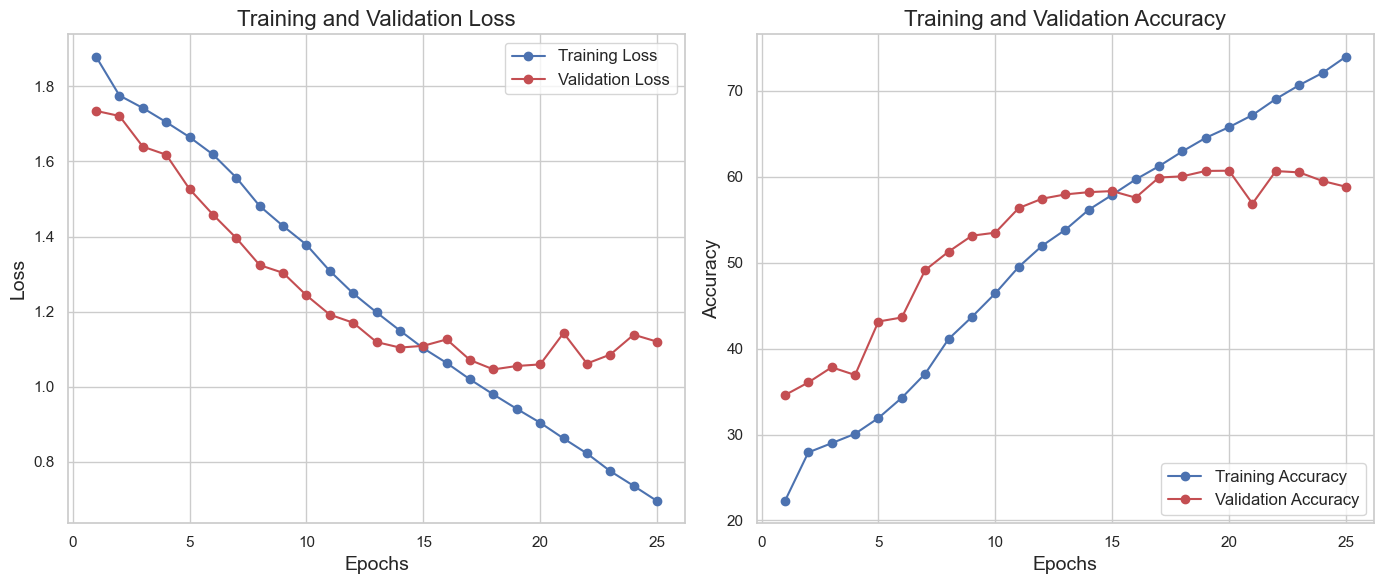

In [18]:
from plots import accuracy_and_validation_plots

from plots import confusion_matrix_plot,classification_report_print,precision_recall_curve_plot
# Example data: Replace these with your actual training and validation data
epochs_= list(range(1, len(train_losses_list)+1))

accuracy_and_validation_plots(epochs_, train_losses_list, test_losses_list, accuracy_train_list,accuracy_test_list).plot_figure("accuracy.png")


In [22]:
from plots import confusion_matrix_plot,classification_report_print,precision_recall_curve_plot,accuracy_and_validation_plots
from plots import model_evaluate,roc_curve_plot


In [26]:
y_true, y_pred=model_evaluate(model__, test_dataloader, device)
label_name = ['1dAVB','AF','LBBB','normal','RBBB','SB','ST']

In [29]:
label_name = ['1dAVB','AF','LBBB','normal','RBBB','SB','ST']

In [38]:
# Step 1: Import the importlib module
import importlib

# Step 2: Import your updated module
import plots
importlib.reload(plots)


<module 'plots' from 'D:\\LARGE_CNN\\ECG_ML\\MAIN\\plots.py'>

In [40]:
from plots import ModelEvaluator

In [41]:
model_evaluator = ModelEvaluator(model__,test_dataloader,label_name)

              precision    recall  f1-score   support

       1dAVB       0.37      0.34      0.36      1016
          AF       0.46      0.35      0.40       996
        LBBB       0.65      0.77      0.70       996
      normal       0.69      0.38      0.49       987
        RBBB       0.42      0.64      0.50      1050
          SB       0.82      0.80      0.81       991
          ST       0.83      0.84      0.84       964

    accuracy                           0.59      7000
   macro avg       0.60      0.59      0.59      7000
weighted avg       0.60      0.59      0.58      7000



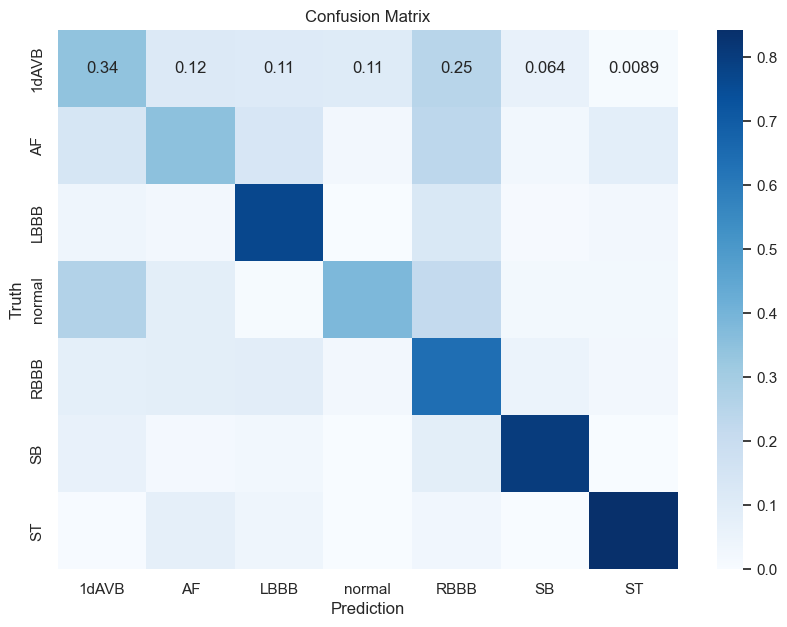

In [49]:
model_evaluator.classification_report_print()
model_evaluator.confusion_matrix_plot()


In [16]:
os.getcwd()
torch.save(model__.state_dict(), 'model_imagestack.pth')

In [17]:
os.getcwd()


'd:\\LARGE_CNN\\ECG_ML\\MAIN\\zenodo_data\\data_stack_image'